<a href="https://colab.research.google.com/github/zitoyeo/EDA-Modeling/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 07 : AirBnB

In [2]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,514 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and dire

In [3]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 불러오기
bnb = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')

In [6]:
#불러온 데이터 일단 보기
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


- id: 일련번호
- name: AirBnB 이름
- host_id: 호스트 ID
- host_name: 호스트 성명
- neighbourhood_group: 지역
- latitude: 위도
- longitude: 경도
- room_type: 방 타입
- price: 가격
- minimum_nights: 최소 숙박일수
- number_of_reviews: 리뷰 개수
- last_review: 최근 리뷰 일자
- reviews_per_month: 월 평균 리뷰 수
- calculated_host_listings_count: 호스트에게 대여 가능한 에어비앤비의 총 개수
- availability_365: 1년 중 가능한 대여일수


* 범주형 변수:
               host_name, Neighbor_group, neighbourhood, room_type
* 연속형 변수:
               id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review,
               reviews_per_month registered_host_listings_count, availability_3653
               

In [7]:
#데이터 기본정보 확인하기
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#데이터 내용 간단히 정리해서 출력

print("총데이터의 개수 :", bnb.shape[0] * bnb.shape[1])
print("총 결측치의 수 : {} = 전체 데이터의 {:.2f}%".format(bnb.isnull().sum().sum(), (bnb.isnull().sum().sum()*100)/(bnb.shape[0]* bnb.shape[1])))
print("호스트 ID : {}개, 호스트 : {} 명".format(bnb['host_id'].nunique(), bnb['host_name'].nunique()))
print("2019 뉴욕의 평균 Airbnb 금액: {:.2f} $".format(bnb['price'].mean()))

총데이터의 개수 : 782320
총 결측치의 수 : 20141 = 전체 데이터의 2.57%
호스트 ID : 37457개, 호스트 : 11452 명
2019 뉴욕의 평균 Airbnb 금액: 152.72 $


## 데이터를 보고 질문 만들기
- 가장 많이 에어비엔비에 리스트 된 호스트는 ?
- 지역별로 가장 비싼 방과 저렴한 방
- 뉴욕의 어느지역이 가장 비쌀까 ?
- 지역별로 에어비앤비 타입이 다를까 ?
- 에어비앤비 금액을 예측할 수 있을까?

## 3. 데이터 정비하기

In [9]:
bnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [1]:
#결측치 시각화 해주는 패키지 사용

import missingno

<Axes: >

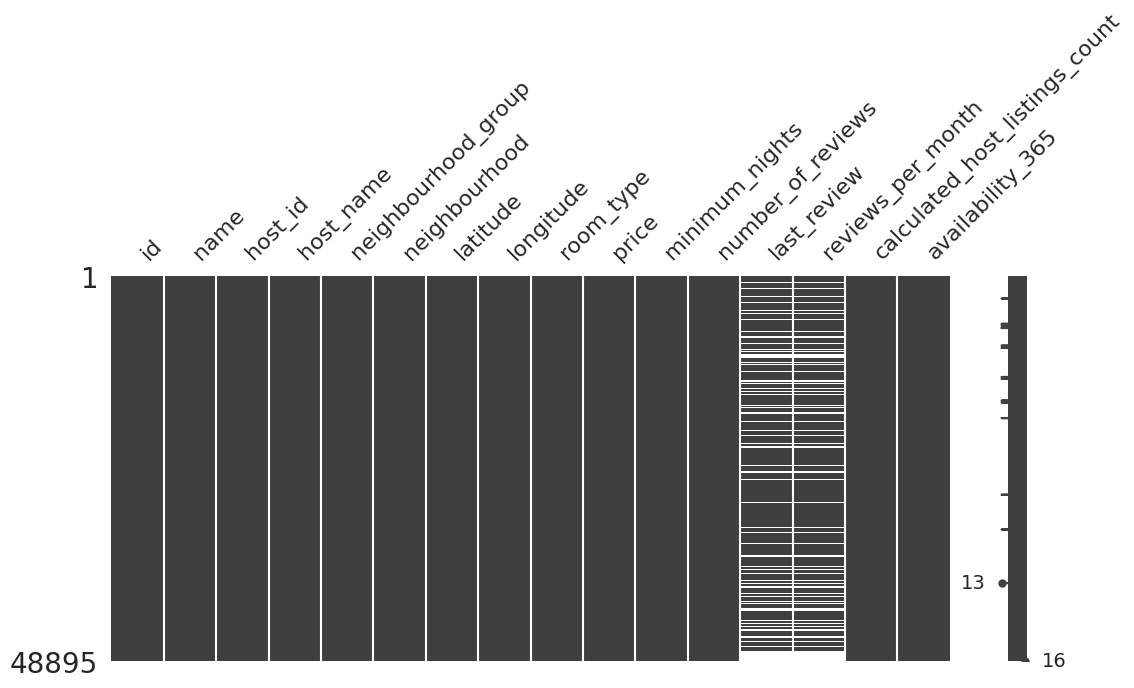

In [10]:
missingno.matrix(bnb, figsize=(12,5))

<Axes: >

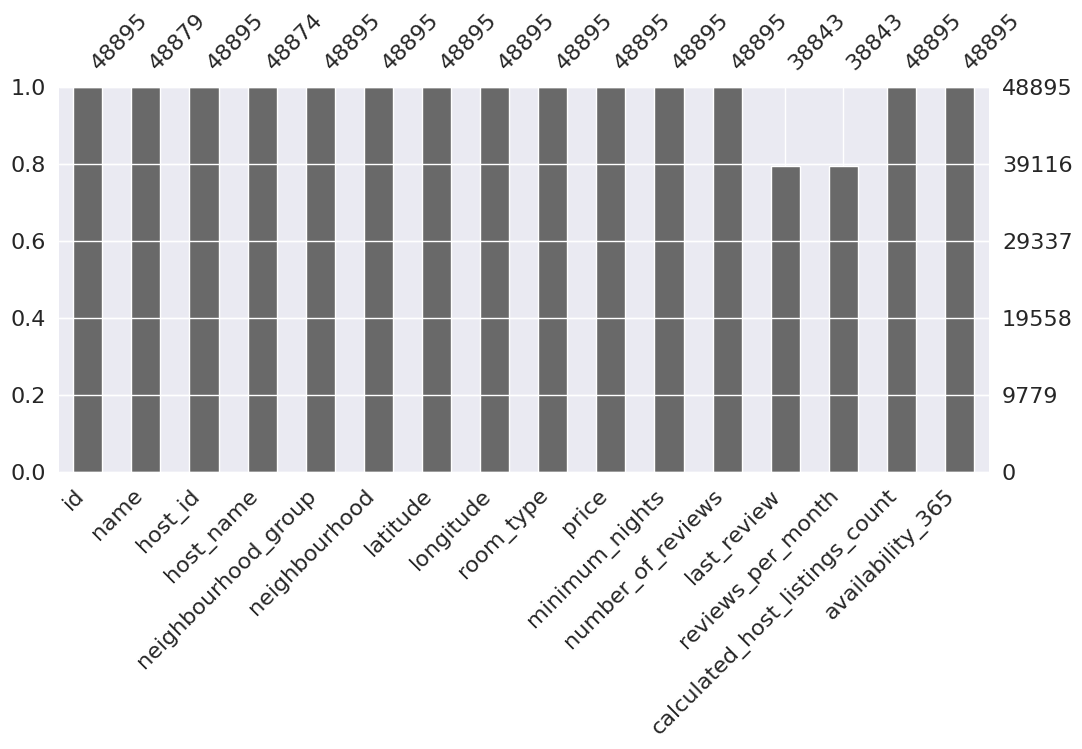

In [11]:
missingno.bar(bnb, figsize=(12,5))

In [14]:
#Nan 값 처리하기
bnb.fillna({'reviers_per_month':0}, inplace=True) # 월 평균 리뷰 개수 (review_per_month는 0처리)
bnb.fillna({'name' : "Noname"}, inplace=True) # 이름이 공백인 경우는 Noname으로 처리

In [15]:
#사용하지 않을 컬럼은 삭제한다
#last review 컬럼은 대체할만한 컬럼이 있으므로 삭제해도 된다.

bnb.drop(['id','last_review'],axis=1, inplace=True)

In [16]:
# 에어비엔비이름과 호스트이름이 같은게 있는지

bnb[bnb['name'] == bnb['host_name']]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,1,0
23996,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90
24607,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0.05,18,180
26734,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,18,365
26752,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,0.05,18,365
26753,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,0.09,18,365
26889,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,18,365


In [17]:
# 중복된 컬럼 확인

bnb.duplicated().sum()

np.int64(0)

In [18]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
len(bnb[bnb['price'] == 0
        ])

11

## 4. EDA & Visuallization

###4-1. 간단한 분석

<ipython-input-25-90d139ff2e36>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bnb['price'], hist =True, ax=ax)


(-1000.0, 6000.0)

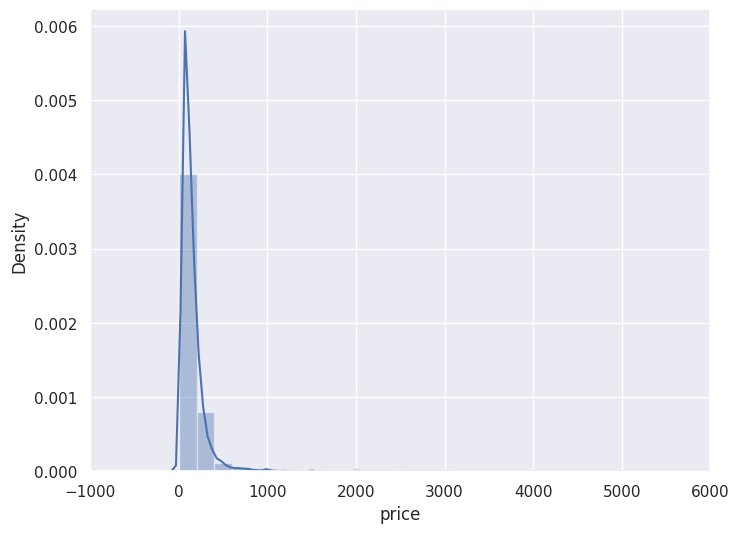

In [25]:
#뉴욕 Airbnb의 금액 분포 나타내기

f,ax = plt.subplots(1,1, figsize=(8,6))
sns.distplot(bnb['price'], hist =True, ax=ax)

#축조정

ax.set_xlim(-1000, 6000)

In [26]:
#skewness and kurtosis 구하기
#Skeness(왜도) 데이터가 정규분포에서 한 쪽으로 치우쳐 있는가 ?
# -3 <왜도 < 3 사이의 값이면 기준에 부합

#Kurtosis(첨도) : 얼마나 뾰족한가 (데이터가 얼마나 평균 근처에 몰려있는가?) 정규 분포의 kurtosis = 0

print("Skewness : %.2f" % bnb['price'].skew())
print("Kurtosis : %.2f" % bnb['price'].kurt())

Skewness : 19.12
Kurtosis : 585.67


In [27]:
#금액과 최소 숙박일수만 남겨 놓기

pd.concat([bnb['price'], bnb['minimum_nights']], axis = 1)

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


<Axes: xlabel='price', ylabel='minimum_nights'>

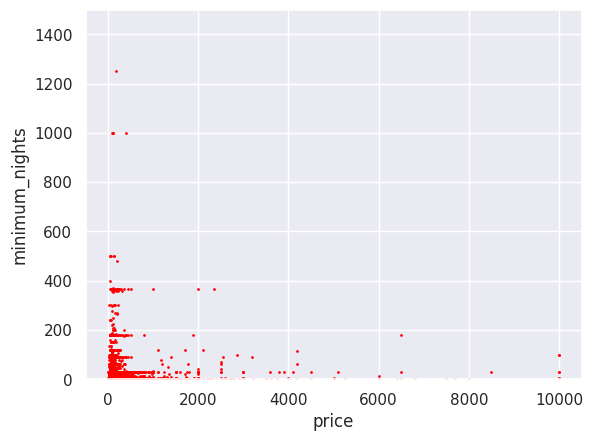

In [29]:
# 가격(price)과 최소 숙박일수 (minimumnights)간의 관계 확인하기
bnb.plot.scatter(x='price', y='minimum_nights', ylim=(0,1500), s=0.9, color='red')
#가격이 0인 데이터가 많이 존재한다!
#이상치로 보이는 데이터도 많다
# 가격이 0dls epdlxjrk aksgdl whswogksek.

<Axes: ylabel='price'>

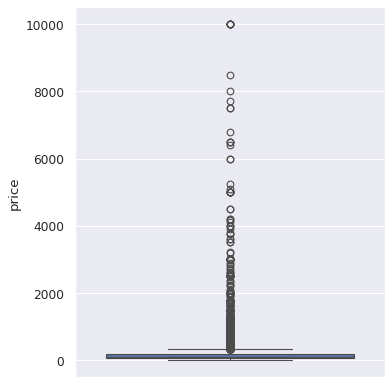

In [32]:
# 금액 분포를 boxplot으로 바꾸자

f, ax = plt.subplots(1,1, figsize = (5,6), dpi = 80)

sns.boxplot(bnb['price'], showfliers = True, ax=ax)

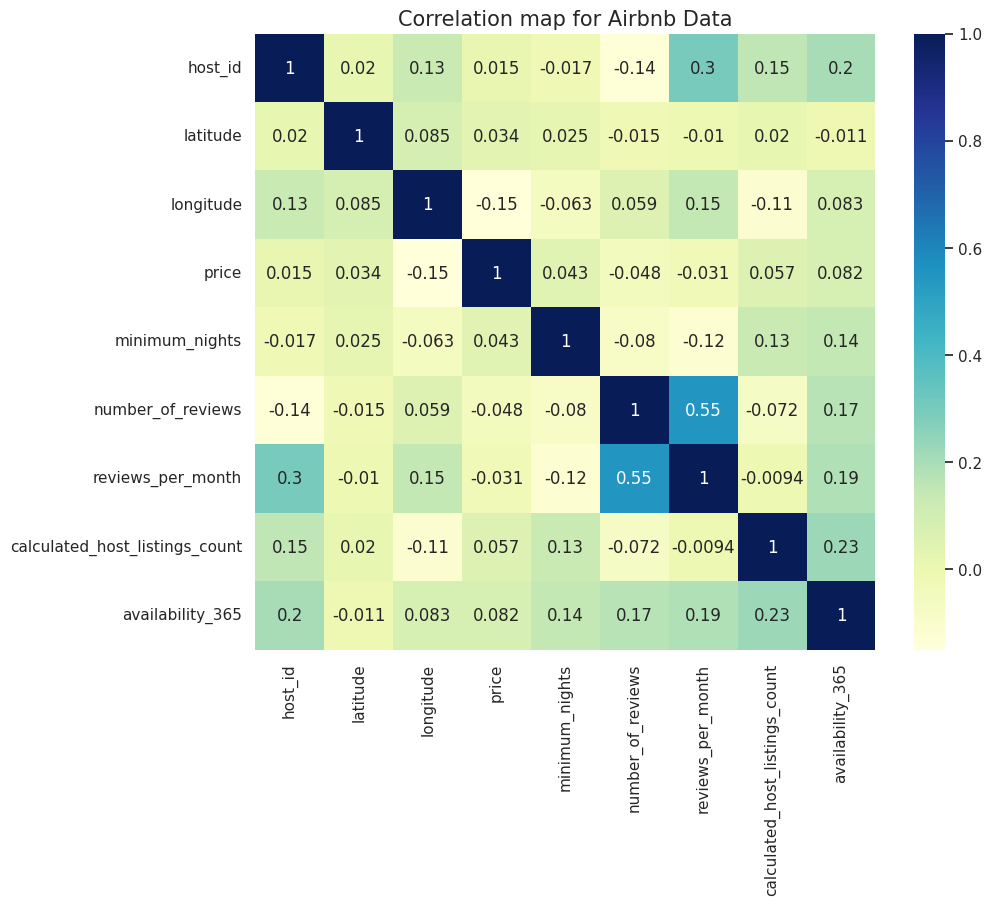

In [38]:
# 컬럼간의 상관관꼐를 heatmap으로 확인해보자

# 숫자형 컬럼만 선택
bnb_numeric = bnb.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corrmat = bnb_numeric.corr()

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='YlGnBu', ax=ax)
plt.title('Correlation map for Airbnb Data', size=15)
plt.show()

### 4-2 금액의 threshold를 정해서 outlier 제거하기

In [39]:
# 이분석은 데이터 정비에 들어가도된다.

min_threshold, max_threshold = bnb['price'].quantile([0.01,0.99]) #백분위수로 0.01, 0.99에 있는 price확인
min_threshold, max_threshold

(30.0, 799.0)

In [42]:
#bnb[bnb['price'] < min_threshold]
bnb[bnb['price'] > max_threshold]


(min = 404, max = 474)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
496,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
662,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249
762,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
780,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,1,222
48305,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,1,270
48523,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,1,349
48535,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,NaN,1,303


In [43]:
# minmum threshold와 maximum threshold 사이에 있는것만 사용하자

bnb_thr = bnb[(bnb['price'] > min_threshold) & (bnb['price'] < max_threshold)]
bnb_thr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47744 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            47744 non-null  object 
 1   host_id                         47744 non-null  int64  
 2   host_name                       47724 non-null  object 
 3   neighbourhood_group             47744 non-null  object 
 4   neighbourhood                   47744 non-null  object 
 5   latitude                        47744 non-null  float64
 6   longitude                       47744 non-null  float64
 7   room_type                       47744 non-null  object 
 8   price                           47744 non-null  int64  
 9   minimum_nights                  47744 non-null  int64  
 10  number_of_reviews               47744 non-null  int64  
 11  reviews_per_month               38067 non-null  float64
 12  calculated_host_listings_count  47744

<ipython-input-44-60ac485acefd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bnb_thr['price'])


<Axes: xlabel='price', ylabel='Density'>

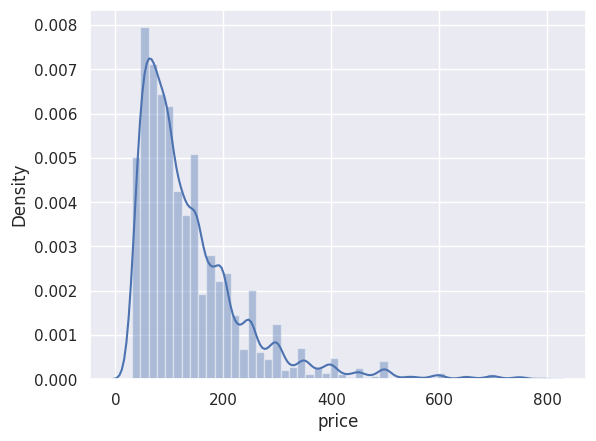

In [44]:
# sns.distplot으로 그액 분포가 어떻게 달라졌는지 확인

sns.distplot(bnb_thr['price'])

In [45]:
print('Skewness : %.2f' % bnb_thr['price'].skew())
print('Kurtosis : %.2f' % bnb_thr['price'].kurt())


Skewness : 2.24
Kurtosis : 7.04


<Axes: ylabel='price'>

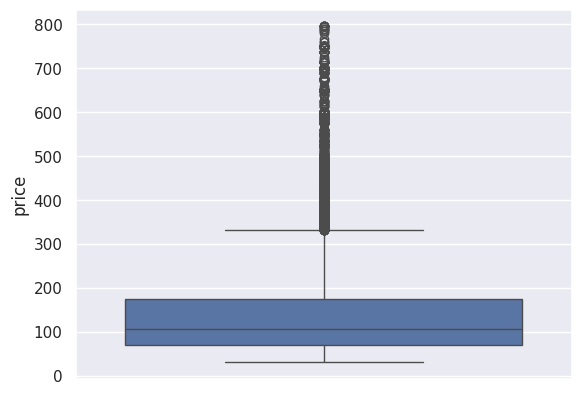

In [46]:
sns.boxplot(bnb_thr['price'])

### 4-3. 가장 많이 리스트 된 호스트는


In [47]:
# 가장많이 리스팅 된 호스트(이름 기준)는 ?
top_host = bnb_thr.host_name.value_counts().head(10)
top_host

,count
host_name,
Michael,410
David,395
Sonder (NYC),327
John,288
Alex,272
Blueground,232
Sarah,225
Daniel,223
Jessica,200


In [50]:
# bar그래프로 나타내기

top_host2 = pd.DataFrame(top_host)
top_host2.reset_index(inplace=True)
top_host2.rename(columns={'index': 'host_name'}, inplace=True)
top_host2

,host_name,count
0,Michael,410
1,David,395
2,Sonder (NYC),327
3,John,288
4,Alex,272
5,Blueground,232
6,Sarah,225
7,Daniel,223
8,Jessica,200
9,Maria,198


<ipython-input-52-65b74c62f702>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


[Text(0, 0, 'Michael'),
 Text(1, 0, 'David'),
 Text(2, 0, 'Sonder (NYC)'),
 Text(3, 0, 'John'),
 Text(4, 0, 'Alex'),
 Text(5, 0, 'Blueground'),
 Text(6, 0, 'Sarah'),
 Text(7, 0, 'Daniel'),
 Text(8, 0, 'Jessica'),
 Text(9, 0, 'Maria')]

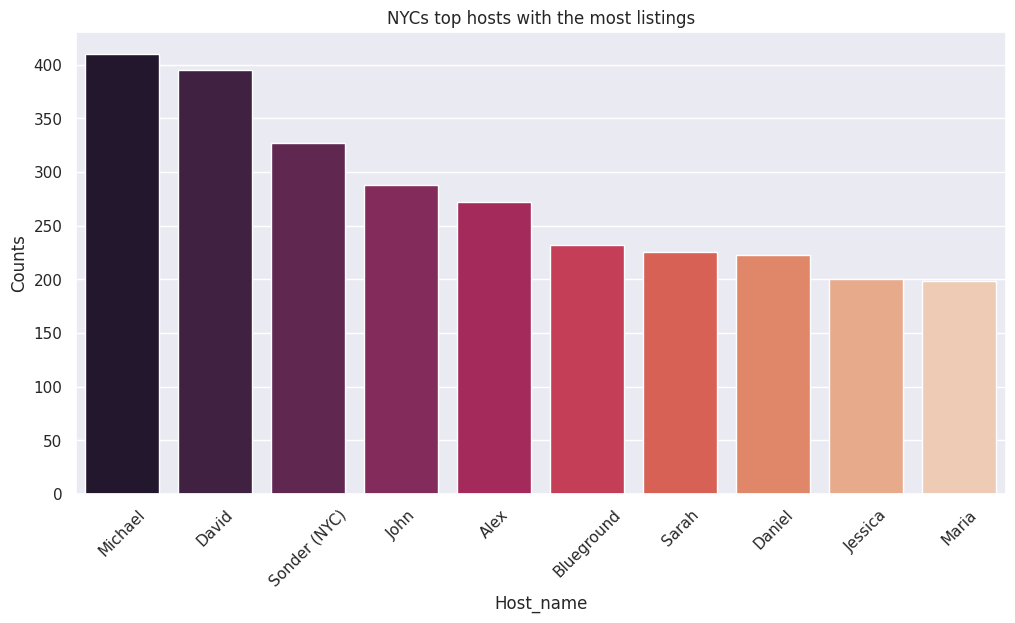

In [52]:
# bar 그래프로 나타내기
f,ax = plt.subplots(1,1, figsize = (12,6))

sns.barplot(x='host_name', y='count', data = top_host2, palette='rocket', ax = ax)

ax.set_title('NYCs top hosts with the most listings')
ax.set_xlabel('Host_name')
ax.set_ylabel('Counts')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# 4-4. 가장비싼방 가장 저렴한 방 어딘지

In [55]:
#지역별로 가장 비싼방은 ?
# IDXmax를 최대값을 가지는 index를 출력

bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()


,price
neighbourhood_group,
Bronx,8521
Brooklyn,4428
Manhattan,7017
Queens,14747
Staten Island,3049


In [56]:
#지역별로 가장 비싼 방은?
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

,name,neighbourhood_group,host_name,price
8521,1 Room in a 2 Bedroom Available,Bronx,Jonathan,680
4428,Unique Brooklyn Brownstone,Brooklyn,Rachel,795
7017,Historic Upper West Side Townhouse,Manhattan,David,795
14747,3 bedroom near Park,Queens,Jackie,750
3049,Spacious center hall colonial,Staten Island,Donna,700


In [57]:
# 지역별로 가장 저렴한 방은

bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()

,price
neighbourhood_group,
Bronx,3889
Brooklyn,2887
Manhattan,7431
Queens,6615
Staten Island,30312


In [58]:
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()][['name', 'neighbourhood_group', 'host_name', 'price']]

,name,neighbourhood_group,host_name,price
3889,"A Simple, Calm Space",Bronx,Août,32
2887,Amazing Spacious Room,Brooklyn,Lord Daniel,31
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Nga,31
6615,"Super Clean, Quiet & Spacious Room",Queens,Troy,31
30312,Nice room near SI Ferry \n15 minutes by car.,Staten Island,Sara I,31


### 4-5. 지역별 금액 분포

In [59]:
#지역(neighbourhood_group)이 어떻게 나뉘어져 있는지 확인하기

bnb_thr['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<Axes: xlabel='neighbourhood_group', ylabel='price'>

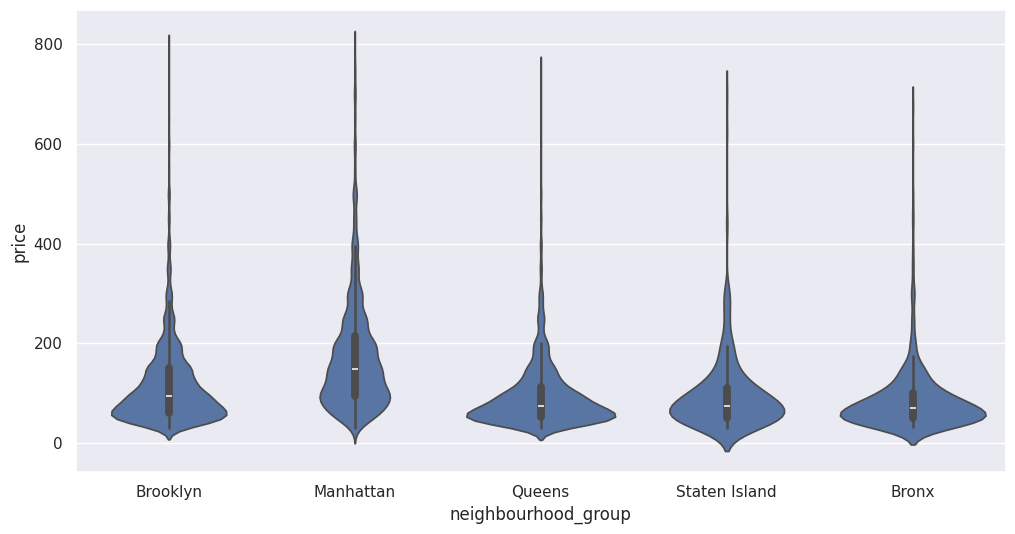

In [60]:
#violinplot으로 지역 별 에어 비엔비 금액 분포 확인하기

f, ax = plt.subplots(1,1, figsize=(12,6))

sns.violinplot(x='neighbourhood_group', y='price', data= bnb_thr)

### 4-6. 지역별 방타입

In [61]:
#방타입 종류

bnb_thr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [65]:
#groupby 한다음 unstack함수를 사용해서 깔끔하게 나타낸다

room_type2 = bnb_thr.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
room_type2

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,377,9470,12887,2080,172
Private room,610,9909,7875,3285,177
Shared room,34,279,458,127,4


[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

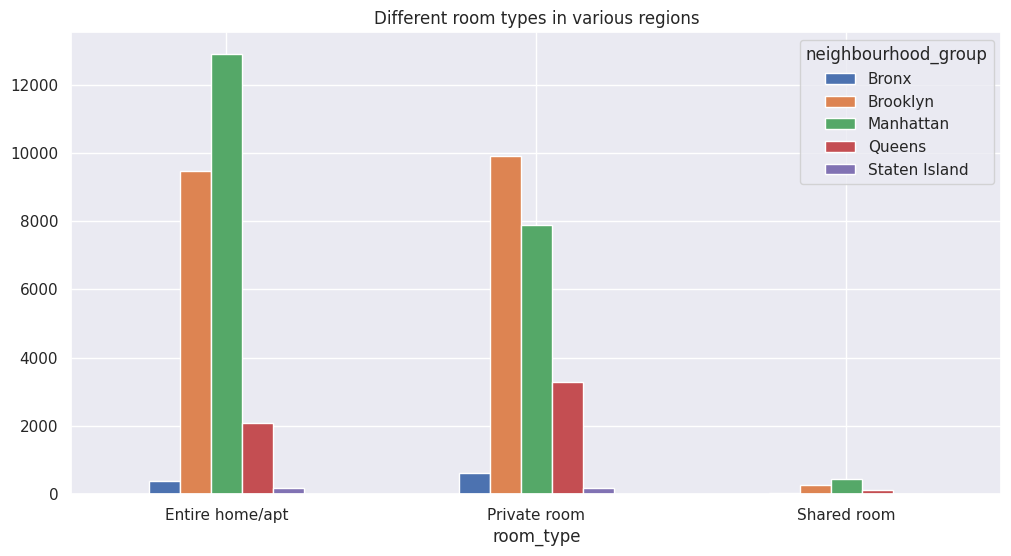

In [69]:
#지역별로 어떤 방타입이 많은가 ?

g = room_type2.plot(kind='bar', figsize=(12,6))
g.set_title('Different room types in various regions')
g.set_xticklabels(g.get_xticklabels(), rotation=0)

### 4-7. 리뷰가 많은방

In [70]:
# 뉴욕에서 가장 리뷰가 많은 방

top10_review = bnb.nlargest(10,'reviews_per_month')
top10_review[['name', 'reviews_per_month', 'neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room types in each Neighbourhood Groupes')

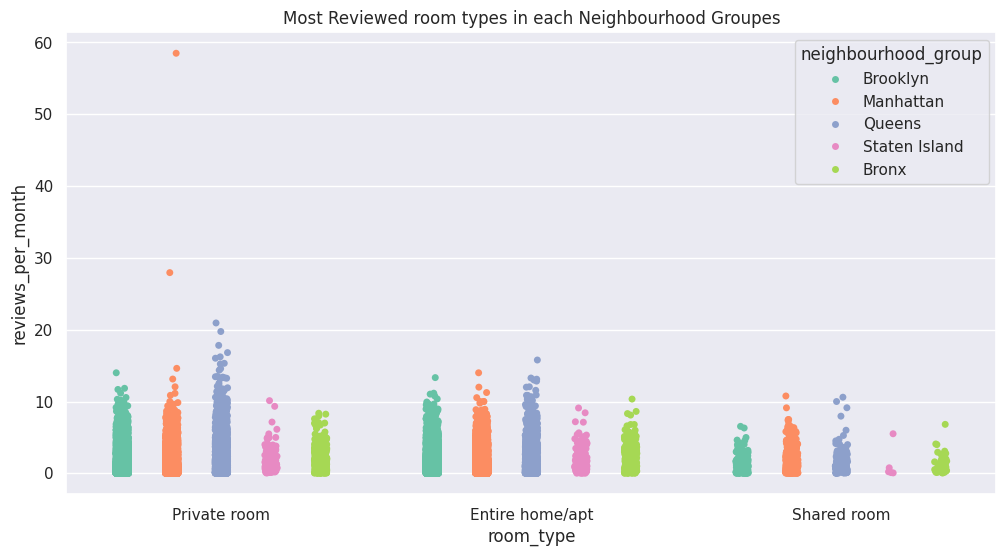

In [73]:
f, ax = plt.subplots(1,1, figsize = (12,6))

# stripplot: 데이터 수와 데이터 분포를 한 눈에 볼수 있는 플롯(박스 / 바이올린플롯의 시각화 바로 직전 모습)
sns.stripplot(x='room_type', y= 'reviews_per_month', data = bnb, hue='neighbourhood_group', dodge=True, jitter = True, palette='Set2', ax = ax)
#dodge = hue 별로 데이터를 나눠서 쌓아준다
#jitter = 가로축 위치에 변동을 줘서 데이터가 겹치지 않도록 해줌

ax.set_title('Most Reviewed room types in each Neighbourhood Groupes')

### 4-8. 위도와 경도를 지도위에 표시해보자

<Axes: xlabel='longitude', ylabel='latitude'>

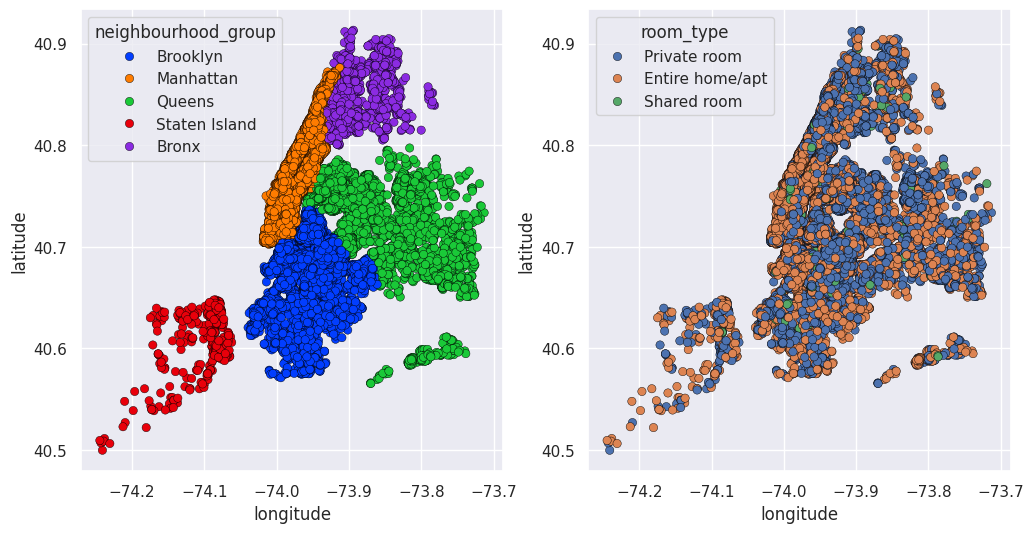

In [74]:
f,ax = plt.subplots(1,2, figsize = (12,6))
sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'neighbourhood_group',palette='bright', edgecolor='black',linewidth=0.3, ax=ax[0])
sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'room_type',edgecolor='black',linewidth=0.3, ax=ax[1])

<Axes: xlabel='longitude', ylabel='latitude'>

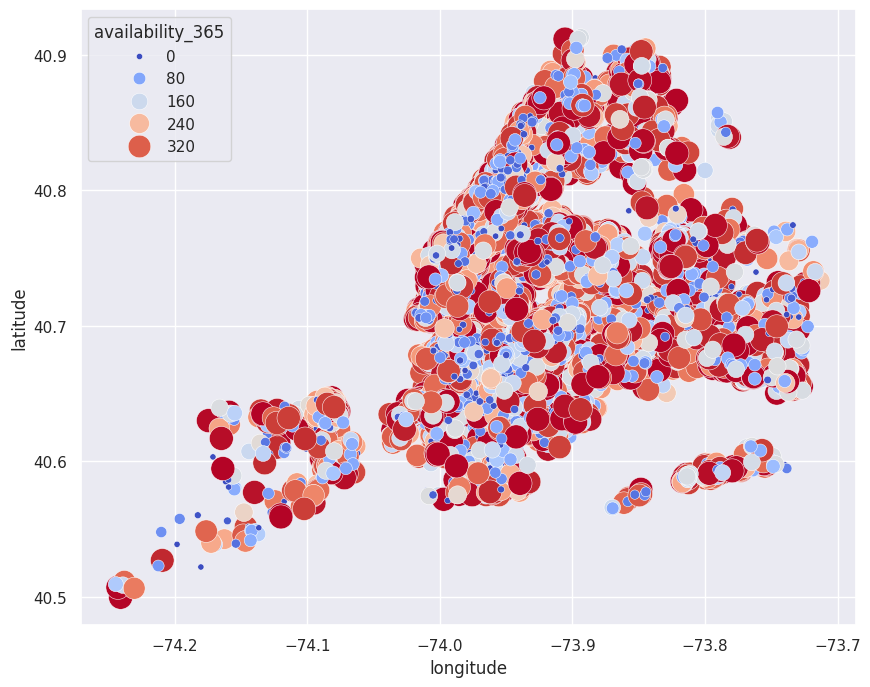

In [75]:
#원의 크기로 데이터 나타내기
f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.scatterplot(data=bnb_thr, x='longitude', y='latitude', hue="availability_365",
                palette='coolwarm', size='availability_365', sizes=(20,300))

## 회귀분석

In [76]:
# 패키지 불러오기

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [77]:
bnb_md = bnb_thr

In [78]:
# 범주형 변수들을 라벨인 코더로 만들자

labelencoder = LabelEncoder()
bnb_md['neighbourhood_group'] = labelencoder.fit_transform(bnb_md['neighbourhood_group'])
bnb_md['neighbourhood'] = labelencoder.fit_transform(bnb_md['neighbourhood'])
bnb_md['room_type'] = labelencoder.fit_transform(bnb_md['room_type'])


<ipython-input-78-9ac2067e0c62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnb_md['neighbourhood_group'] = labelencoder.fit_transform(bnb_md['neighbourhood_group'])
<ipython-input-78-9ac2067e0c62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnb_md['neighbourhood'] = labelencoder.fit_transform(bnb_md['neighbourhood'])
<ipython-input-78-9ac2067e0c62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [79]:
feature_columns  = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
                 'calculated_host_listings_count', 'availability_365']

In [83]:
# 설명변수

X = bnb_md[feature_columns]

# 타겟 변수
y = bnb_md['price']

# 학습데이터와 평가데이터 나누기 (7:3)

train_x, test_x,train_y, test_y = train_test_split(X,y, train_size =0.7, test_size= 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(33420, 6) (14324, 6) (33420,) (14324,)


In [84]:
# 선형회귀분석

linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression()

In [86]:
#결과 확인하기
test_predict = linreg.predict(test_x)
print('Accuracy on test set: {}'.format(linreg.score(test_x, test_y)))

Accuracy on test set: 0.2725255481961407


In [91]:
# 결과 확인하기 2
test_predict = linreg.predict(test_x)
error = pd.DataFrame(np.array(test_y).flatten(), columns=['Actual'])
error['Prediction'] = np.array(test_predict)
error['Delta'] = abs(error['Actual'] - error['Prediction'])
error.head(10)

,Actual,Prediction,Delta
0,100,168.600298,68.600298
1,100,163.521372,63.521372
2,120,180.533516,60.533516
3,150,181.898624,31.898624
4,290,203.603308,86.396692
5,135,186.163936,51.163936
6,215,289.954996,74.954996
7,40,6.327763,33.672237
8,180,174.923926,5.076074
9,80,192.507098,112.507098


### 6. Review

- Airbnb 데이터는:


- 총 데이터 개수 : 783320
- 총 결측치 수 : 20141 = 전체데이터의 2.57%
- 호스트 id : 37457개 호스트 11452명
- 2019 뉴욕의 평균 airbnb금액은 : 152.72 $

- 가장 많이 에어비엔비에 리스트된 호스트는 ?
- 지역별로 가장 비싼방과 가장 싼방은 ?
- 뉴욕의 어느지역이 가장 비쌀까 ?
- 지역별로 에어비앤비 타입이 다를까 ?

- 이 데이터의 경우 다른 컬럼을 이용해 선형회귀로 금액을 예측하기 어려움




